In [ ]:
# Importing library

In [387]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [388]:
#Preprocessing

In [389]:
def extract_mfcc(audio_path, max_pad_len=100):
    audio, sr = librosa.load(audio_path, mono=True)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    pad_width = max_pad_len - mfccs.shape[1]
    
    # Ensure pad_width is n
    if pad_width < 0:
        mfccs = mfccs[:, :max_pad_len]
    else:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0,pad_width)), mode='constant')
    
    return mfccs

def load_data(data_dir):
    labels = []
    mfccs = []
    max_pad_len = 0
    
    for label, folder in enumerate(os.listdir(data_dir)):
        for filename in os.listdir(os.path.join(data_dir, folder)):
            if filename.endswith(".wav") or filename.endswith(".mp3") :
                audio_path = os.path.join(data_dir, folder, filename)
                mfcc = extract_mfcc(audio_path)
                mfccs.append(mfcc)
                labels.append(label)
                
                if mfcc.shape[1] > max_pad_len:
                    max_pad_len = mfcc.shape[1]
    
    return np.array(mfccs), np.array(labels)

In [390]:
data_dir = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio_Classification\\data"

In [391]:
#Load Data

In [392]:
X, y = load_data(data_dir)

In [393]:
#Split and Encode data

In [394]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [395]:
#Display Audio

In [396]:
#Build Neaural Network

In [397]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling1D, Flatten, Dense, BatchNormalization

model = Sequential()
input_shape = (X.shape[1], X.shape[2], 1) 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=np.max(y) + 1, activation='softmax'))


In [398]:
#RUN Nuetwork

In [399]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [400]:
#Trainig model

In [401]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
12/12 [==============================] - 3s 110ms/step - loss: 0.5897 - accuracy: 0.7898 - val_loss: 3.3767 - val_accuracy: 0.6209
Epoch 2/20
12/12 [==============================] - 1s 90ms/step - loss: 0.1555 - accuracy: 0.9533 - val_loss: 3.6266 - val_accuracy: 0.6209
Epoch 3/20
12/12 [==============================] - 1s 91ms/step - loss: 0.1056 - accuracy: 0.9670 - val_loss: 1.4043 - val_accuracy: 0.7418
Epoch 4/20
12/12 [==============================] - 1s 90ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 1.1887 - val_accuracy: 0.7143
Epoch 5/20
12/12 [==============================] - 1s 91ms/step - loss: 0.0256 - accuracy: 0.9904 - val_loss: 0.6865 - val_accuracy: 0.8242
Epoch 6/20
12/12 [==============================] - 1s 91ms/step - loss: 0.0187 - accuracy: 0.9973 - val_loss: 0.4154 - val_accuracy: 0.8297
Epoch 7/20
12/12 [==============================] - 1s 91ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.8971 - val_accuracy: 0.8022
Epoch 8/20
1

In [402]:
#Evaluting model

In [403]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

6/6 [==============================] - 0s 17ms/step - loss: 0.0796 - accuracy: 0.9835
Test accuracy: 98.35%


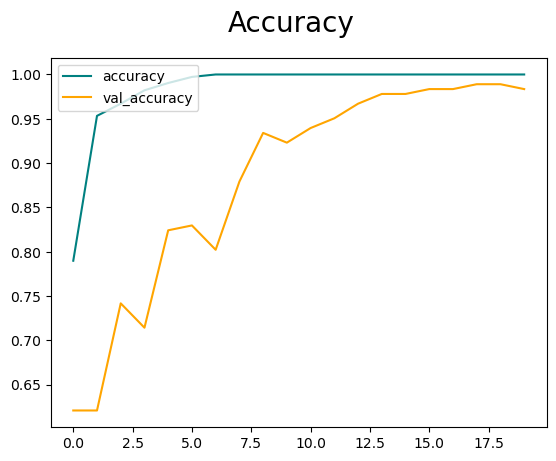

In [404]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

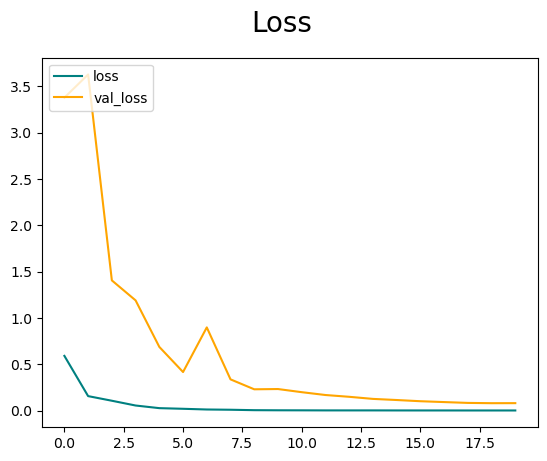

In [405]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [406]:
file_path = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\speech _Recognition\\Audio_Classification\\data\\Forest Recordings\\recording_94.mp3"
test_mfcc = extract_mfcc(file_path)
test_mfcc = np.expand_dims(test_mfcc, axis=0) 
predicted_class = np.argmax(model.predict(test_mfcc))
class_labels = ['Forest Recordings', 'Parsed_Capuchinbird_Clips', 'Parsed_Not_Capuchinbird_Clips']
predicted_label = class_labels[predicted_class]

print(f"The predicted class is: {predicted_label}")

1/1 [==============================] - 0s 143ms/step
The predicted class is: Forest Recordings


In [407]:
model.save('audio.model')

INFO:tensorflow:Assets written to: audio.model\assets


INFO:tensorflow:Assets written to: audio.model\assets
